![Alt text](https://www.fullstackpython.com/img/logos/sqlalchemy.jpg)

In [1]:
from sqlalchemy import create_engine
from sqlalchemy import MetaData, Table
from sqlalchemy import select

# $Connecting$
***

In [2]:
engine = create_engine('sqlite:///Chinook_Sqlite.sqlite')
connection = engine.connect()

# $Reflecting$
***

In [3]:
# Print tables in database 
print(engine.table_names())

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


In [4]:
# Select a table and print the columns
metadata = MetaData()
table = Table('Customer', metadata, autoload=True, autoload_with=engine) 
print(table.columns.keys())

['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email', 'SupportRepId']


# $Querying$
***

### $With$ $SQL$

In [5]:
stmt = 'SELECT * FROM Customer'
results1 = connection.execute(stmt)

### ***With Pythonic Language***

In [6]:
# Requires reflecting
stmt = select([table])
results2 = connection.execute(stmt)

# $Extracting$
***

In [7]:
# All rows
data = results1.fetchall()
print(data[0])

(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3)


In [8]:
# Some rows 
sample = results2.fetchmany(10)
print(sample)

[(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3), (2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@surfeu.de', 5), (3, 'François', 'Tremblay', None, '1498 rue Bélanger', 'Montréal', 'QC', 'Canada', 'H2G 1A7', '+1 (514) 721-4711', None, 'ftremblay@gmail.com', 3), (4, 'Bjørn', 'Hansen', None, 'Ullevålsveien 14', 'Oslo', None, 'Norway', '0171', '+47 22 44 22 22', None, 'bjorn.hansen@yahoo.no', 4), (5, 'František', 'Wichterlová', 'JetBrains s.r.o.', 'Klanova 9/506', 'Prague', None, 'Czech Republic', '14700', '+420 2 4172 5555', '+420 2 4172 5555', 'frantisekw@jetbrains.com', 4), (6, 'Helena', 'Holý', None, 'Rilská 3174/6', 'Prague', None, 'Czech Republic', '14300', '+420 2 4177 0449', None, 'hholy@gmail.com', 5), (7, 'Ast

# $DataFraming$
***

In [9]:
import pandas as pd

df = pd.DataFrame(data)
df.columns = results1.keys()
df.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


# $Closing the Connection$
***

In [10]:
connection.close()

![alt text](http://heienv.com/wp-content/uploads/2017/03/fancy-line-break.png)

![Alt Text](https://connpass-tokyo.s3.amazonaws.com/event/23921/e10670013b344729b00b22f12f842bca.png)

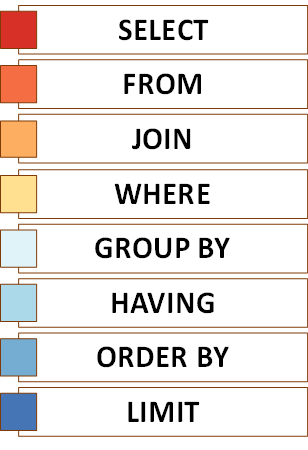

|$Basic$ $Select$|.   |.   |  
|:--------------------------------------------------|:---------------------------|:-------------------------------------------------|  
|**SELECT** *column names*<br>**FROM** *table name*;|Select data from a table|**SELECT*** LastName, FirstName<br>**FROM** Persons|       
|**SELECT** \*<br>**FROM** *table name*;|Select all data from a table|**SELECT** \*<br>**FROM** Persons|
|**SELECT DISTINCT** *column names*<br>**FROM** *table name*;|Select only distinct (different) data from a table|**SELECT DISTINCT** LastName<br>**FROM** Persons;|
  
|$Where$ $Clauses$|.|.
|:---|:---|:---|
|**SELECT** *column names*<br>**FROM** *table name*<br>**WHERE** *value*<br>**AND** *value*<br>**OR** *value*<br>**AND**(...**OR**...)<br>etc.|Select specific data from a table<br><br>- Equal  to:   =<br>- Not equal to:   <><br>- Greater than:   ><br>- Less than:   <<br>- Greater or equal to:   >=<br>- Less or equal to:   <=|**SELECT** \*<br>**FROM** Persons<br>**WHERE** sex='female';<br><br>**SELECT** \*<br>**FROM** Persons<br>**WHERE** FirstName='Ryan'<br>**AND** LastName='Brenner';<br><br>**SELECT** \*<br>**FROM** Persons<br>**WHERE** (FirstName='Ryan' **OR** FirstName='Bryan')<br>**AND** LastName='Brenner';|